<a href="https://colab.research.google.com/github/pranavkalal/Reinforcement-Learning-Model/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Stock Prices with Linear Regression

In [ ]:
#install dependecies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
style.use('bmh')

### LOADING THE DATASET

In [ ]:
#LOAD CSV FILE 
from google.colab import files 
  
uploaded = files.upload()
  #importing dataset from the drive

Saving google_2014.csv to google_2014.csv


In [ ]:
dataset = pd.read_csv('google_2014.csv')
##replace datafile.csv with your csv file

### DATASET DEFINITION

In [ ]:
dataset.describe()
#describing the dataset

,Unnamed: 0,Open,High,Low,Close,Volume
count,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,96.500000,3.625309,3.681959,3.565722,3.617732,2.315391e+07
std,56.147128,0.644966,0.652331,0.641441,0.650250,2.003752e+07
min,0.000000,2.440000,2.530000,2.350000,2.470000,4.029600e+06
25%,48.250000,2.792500,2.850000,2.750000,2.782500,1.229382e+07
50%,96.500000,3.940000,4.000000,3.870000,3.935000,1.744780e+07
75%,144.750000,4.100000,4.150000,4.060000,4.100000,2.749208e+07
max,193.000000,4.660000,4.800000,4.570000,4.660000,1.561137e+08


In [ ]:
#dataset['Date']=pd.to_datetime(dataset.Date)


In [ ]:
dataset.shape

(194, 7)

In [ ]:
print(dataset)

     Unnamed: 0        Date  Open  High   Low  Close    Volume
0             0  2014-03-27  3.99  4.07  3.87   3.91  24532000
1             1  2014-03-28  3.93  3.97  3.87   3.88  13189200
2             2  2014-03-31  3.93  4.02  3.90   4.01  15386000
3             3  2014-04-01  4.04  4.10  4.02   4.07  18778800
4             4  2014-04-02  4.12  4.12  4.06   4.06  14839500
..          ...         ...   ...   ...   ...    ...       ...
189         189  2014-12-24  2.63  2.70  2.63   2.65   4624000
190         190  2014-12-26  2.65  2.69  2.65   2.65   4029600
191         191  2014-12-29  2.64  2.66  2.63   2.66   8527000
192         192  2014-12-30  2.64  2.70  2.63   2.63   7783700
193         193  2014-12-31  2.64  2.70  2.64   2.67  11177900

[194 rows x 7 columns]


In [ ]:
print(dataset.head(100))

    Unnamed: 0        Date  Open  High   Low  Close    Volume
0            0  2014-03-27  3.99  4.07  3.87   3.91  24532000
1            1  2014-03-28  3.93  3.97  3.87   3.88  13189200
2            2  2014-03-31  3.93  4.02  3.90   4.01  15386000
3            3  2014-04-01  4.04  4.10  4.02   4.07  18778800
4            4  2014-04-02  4.12  4.12  4.06   4.06  14839500
..         ...         ...   ...   ...   ...    ...       ...
95          95  2014-08-12  4.12  4.14  4.08   4.08  27369900
96          96  2014-08-13  4.08  4.15  4.03   4.11  30396800
97          97  2014-08-14  4.10  4.17  4.08   4.08  26148100
98          98  2014-08-15  4.12  4.14  4.07   4.13  33349200
99          99  2014-08-18  4.14  4.22  4.14   4.21  45381300

[100 rows x 7 columns]


In [ ]:
dataset.isnull().sum()
#Checking if any value is NULL

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [ ]:
dataset.isna().any()
#is there any boolean values

Unnamed: 0    False
Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
dtype: bool

In [ ]:
dataset.info()
#information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   Date        194 non-null    object 
 2   Open        194 non-null    float64
 3   High        194 non-null    float64
 4   Low         194 non-null    float64
 5   Close       194 non-null    float64
 6   Volume      194 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 10.7+ KB


### VISUALIZING THE DATASET THROUGH GRAPH

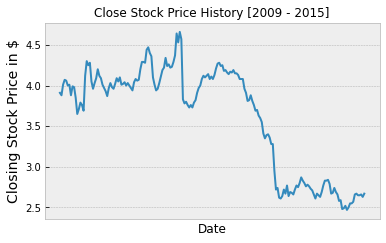

In [ ]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(dataset['Date'], dataset['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2015]', fontsize=12)
# Set x label
plt.xlabel('Date', fontsize=12)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Another way of plotting the graph


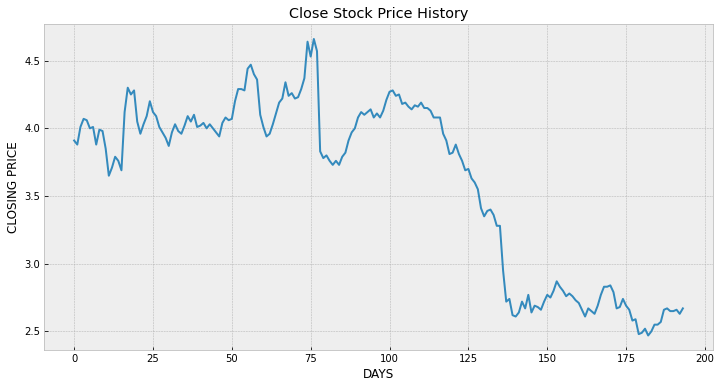

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Close Stock Price History')
plt.xlabel('DAYS')
plt.ylabel('CLOSING PRICE')
plt.plot(dataset['Close'])
plt.show()

## TRAINING AND TESTING

In [ ]:
#GET the close price 
#dataset = dataset[['Close']]
#dataset = dataset[['Open','High','Low','Volume']].values

dataset.head(4)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2014-03-27,3.99,4.07,3.87,3.91,24532000
1,1,2014-03-28,3.93,3.97,3.87,3.88,13189200
2,2,2014-03-31,3.93,4.02,3.90,4.01,15386000
3,3,2014-04-01,4.04,4.10,4.02,4.07,18778800


In [ ]:
#Create a variable to predict 'x' days into the future
future_days=25
#Create a new column(target) shifted 'x' days up
dataset['Predictions']=dataset[['Close']].shift(-future_days)  
dataset.tail(4)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Predictions
190,190,2014-12-26,2.65,2.69,2.65,2.65,4029600,NaN
191,191,2014-12-29,2.64,2.66,2.63,2.66,8527000,NaN
192,192,2014-12-30,2.64,2.70,2.63,2.63,7783700,NaN
193,193,2014-12-31,2.64,2.70,2.64,2.67,11177900,NaN


In [ ]:
#create the future data set(X)and convert it to the numpy array and remove last rows 
x =np.array(dataset.drop(['Date','Predictions','Close'], 1))[:-future_days]
# x = np.array(dataset[['High','Low','Open','Volume']].values)
print(x)

[[0.000000e+00 3.990000e+00 4.070000e+00 3.870000e+00 2.453200e+07]
 [1.000000e+00 3.930000e+00 3.970000e+00 3.870000e+00 1.318920e+07]
 [2.000000e+00 3.930000e+00 4.020000e+00 3.900000e+00 1.538600e+07]
 [3.000000e+00 4.040000e+00 4.100000e+00 4.020000e+00 1.877880e+07]
 [4.000000e+00 4.120000e+00 4.120000e+00 4.060000e+00 1.483950e+07]
 [5.000000e+00 4.070000e+00 4.100000e+00 3.970000e+00 1.680230e+07]
 [6.000000e+00 4.030000e+00 4.110000e+00 3.920000e+00 2.342700e+07]
 [7.000000e+00 3.980000e+00 3.990000e+00 3.830000e+00 2.487460e+07]
 [8.000000e+00 3.890000e+00 4.000000e+00 3.830000e+00 1.733910e+07]
 [9.000000e+00 4.010000e+00 4.020000e+00 3.950000e+00 1.127030e+07]
 [1.000000e+01 3.970000e+00 4.010000e+00 3.840000e+00 2.136430e+07]
 [1.100000e+01 3.820000e+00 3.850000e+00 3.650000e+00 3.442880e+07]
 [1.200000e+01 3.720000e+00 3.780000e+00 3.650000e+00 2.273510e+07]
 [1.300000e+01 3.740000e+00 3.820000e+00 3.720000e+00 2.175430e+07]
 [1.400000e+01 3.810000e+00 3.830000e+00 3.73000

In [ ]:
#Create the target data Y
y=np.array(dataset['Predictions'])[:-future_days]
print(y)

[4.12 4.09 4.01 3.97 3.93 3.87 3.97 4.03 3.98 3.96 4.02 4.09 4.05 4.1
 4.01 4.02 4.04 4.   4.03 4.   3.97 3.94 4.04 4.08 4.06 4.07 4.2  4.29
 4.29 4.28 4.44 4.47 4.4  4.36 4.1  4.01 3.94 3.96 4.03 4.11 4.19 4.22
 4.34 4.24 4.26 4.22 4.23 4.29 4.37 4.64 4.53 4.66 4.57 3.83 3.78 3.8
 3.76 3.73 3.76 3.73 3.79 3.82 3.91 3.97 4.   4.08 4.12 4.1  4.12 4.14
 4.08 4.11 4.08 4.13 4.21 4.27 4.28 4.24 4.25 4.18 4.19 4.16 4.14 4.17
 4.16 4.19 4.15 4.15 4.13 4.08 4.08 4.08 3.96 3.91 3.81 3.82 3.88 3.81
 3.76 3.69 3.7  3.63 3.6  3.55 3.41 3.35 3.39 3.4  3.36 3.28 3.28 2.95
 2.72 2.74 2.62 2.61 2.64 2.72 2.67 2.77 2.64 2.69 2.68 2.66 2.72 2.77
 2.75 2.8  2.87 2.83 2.8  2.76 2.78 2.76 2.73 2.71 2.66 2.61 2.67 2.65
 2.63 2.69 2.77 2.83 2.83 2.84 2.79 2.67 2.68 2.74 2.69 2.66 2.58 2.59
 2.48 2.49 2.52 2.47 2.5  2.55 2.55 2.57 2.66 2.67 2.65 2.65 2.66 2.63
 2.67]


In [ ]:
 #x = dataset[['High','Low','Open','Volume']].values
#y = dataset['Close'].values
#dataset.tail(10)

In [ ]:
#Splitting the data into 70% training and 30% testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

## **Linear Regression**
Our data contains only one **independent variable** ( X ) which represents the date and the **dependent variable** ( Y ) we are trying to predict is the Stock Price. To fit a line to the data points, which then represents an estimated relationship between  X  and  Y , we can use a Simple Linear Regression.

The best fit line can be described with
**Y=β0+β1X** 

where

Y  is the predicted value of the dependent variable
β0  is the y-intercept
β1  is the slope
X  is the value of the independent variable
The goal is to find such coefficients  β0  and  β1  that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

In [ ]:
#Linear regressor model
Lr = LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(Lr.coef_)

[-9.72151502e-03 -1.20629228e+00 -9.60074242e-01  2.46475342e+00
  6.25611185e-09]


In [ ]:
print(Lr.intercept_)

3.3314088851429617


## Predicting future days values 

In [ ]:
#get the last 'x' rows of the future data set
x_future = dataset.drop(['Date','Predictions','Close'], 1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[1.44000e+02, 2.70000e+00, 2.78000e+00, 2.68000e+00, 2.40338e+07],
       [1.45000e+02, 2.79000e+00, 2.80000e+00, 2.64000e+00, 2.30348e+07],
       [1.46000e+02, 2.68000e+00, 2.71000e+00, 2.65000e+00, 2.37310e+07],
       [1.47000e+02, 2.69000e+00, 2.73000e+00, 2.67000e+00, 1.19458e+07],
       [1.48000e+02, 2.68000e+00, 2.71000e+00, 2.65000e+00, 1.33075e+07],
       [1.49000e+02, 2.69000e+00, 2.77000e+00, 2.67000e+00, 2.28783e+07],
       [1.50000e+02, 2.75000e+00, 2.81000e+00, 2.73000e+00, 1.56009e+07],
       [1.51000e+02, 2.79000e+00, 2.79000e+00, 2.70000e+00, 1.30261e+07],
       [1.52000e+02, 2.79000e+00, 2.83000e+00, 2.75000e+00, 1.47048e+07],
       [1.53000e+02, 2.81000e+00, 2.90000e+00, 2.81000e+00, 1.17336e+07],
       [1.54000e+02, 2.90000e+00, 2.91000e+00, 2.75000e+00, 1.25243e+07],
       [1.55000e+02, 2.85000e+00, 2.87000e+00, 2.77000e+00, 9.63510e+06],
       [1.56000e+02, 2.78000e+00, 2.80000e+00, 2.75000e+00, 8.93290e+06],
       [1.57000e+02, 2.77000e+00, 2.80

In [ ]:
#Showing model linear prediction
Lr_prediction=Lr.predict(x_future)
#result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
print(Lr_prediction)
print()

[2.76141249 2.51908319 2.75746355 2.69204316 2.67280993 2.70259211
 2.68444706 2.5556245  2.64123982 2.66948431 2.39865725 2.51887323
 2.60710926 2.62384381 2.60096411 2.5084766  2.47349924 2.466474
 2.44187299 2.51551111 2.44709324 2.41908678 2.44770321 2.51764363
 2.56258598]



In [ ]:
y_pred = Lr.predict(x_test)
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
result.tail(25)


,Actual,Predicted
26,3.93,4.466829
27,3.35,3.465785
28,2.83,2.761412
29,3.69,3.811405
30,4.00,3.923698
31,2.62,3.335413
32,4.08,3.867186
33,3.82,3.807783
34,3.41,3.428949
35,2.65,2.447093


### **RESULTANT PREDICTION FOR LINEAR REGRESSION**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


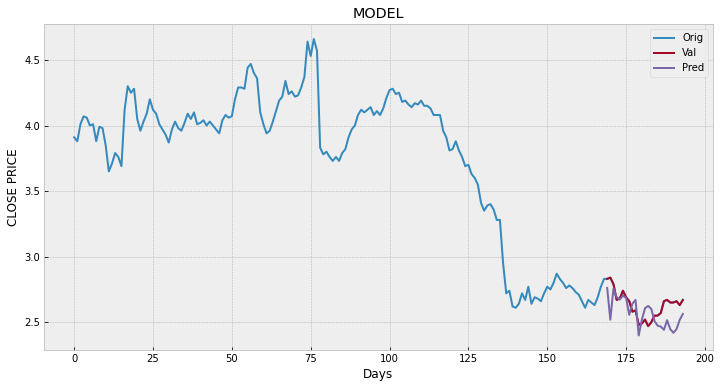

In [ ]:
prediction = Lr_prediction
valid = dataset[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(12,6))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('CLOSE PRICE')
plt.plot(dataset['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  


Mean Absolute Error: 0.2104397222006267
Mean Squared Error: 0.0742867242082791
Root Mean Squared Error: 0.2725559102427961


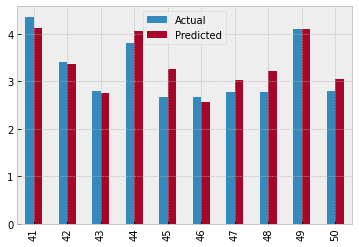

In [ ]:
import math
graph =result.tail(10)
graph.plot(kind='bar')